## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt



In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = r'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [2]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))

784594


In [3]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))

9996


## 將 txt 轉成 pandas dataframe

In [4]:
import pandas as pd
arrange_data = []
for line in data:
    arrange_data.append(line.split('\t'))

list_labels = ['ID', 'link']
df = pd.DataFrame(arrange_data)
df.columns=list_labels
df.head()

,ID,link
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [5]:
arrange_data = []
for line in data:
    arrange_data.append(line.split('\t'))
arrange_data

[['n00015388_157',
  'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'],
 ['n00015388_238',
  'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'],
 ['n00015388_304',
  'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg'],
 ['n00015388_327',
  'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'],
 ['n00015388_355',
  'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg'],
 ['n00015388_373', 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg'],
 ['n00015388_379',
  'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg'],
 ['n00015388_388',
  'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg'],
 ['n00015388_442',
  'http://www.porschemania.it/discus/messages/815/102099.jpg'],
 ['n00015388_474',
  'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg'],
 ['n00015388_514',
  'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jp

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

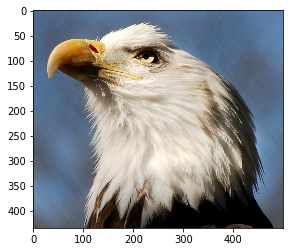

In [7]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,'link']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
img = np.array(img)

plt.imshow(img)
plt.show()

In [10]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for link in url_list:
        print(link)
        try:
            response = requests.get(link)
            img = Image.open(BytesIO(response.content))
            img_list.append(np.array(img))
        except:
            print("-------------------------")
            print('URL %s is lost....' %link)
            print("-------------------------")
    return img_list

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
-------------------------
URL http://img100.imageshack.us/img100/3253/forrest004fs9.jpg is lost....
-------------------------
Total images that we got: 4 


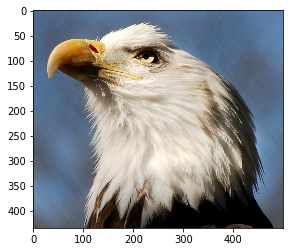

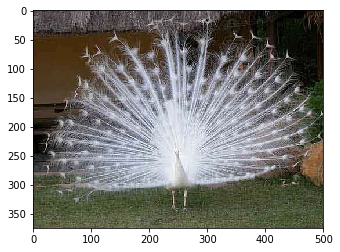

In [11]:
#result = img2arr_fromURLs(df[0:5][1].values)
result = img2arr_fromURLs(df.values[0:5,1])
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()